In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('weather.csv')
print(df.shape)
print(df.iloc[:10, 0:1])

(22064, 29)
  Local time in Kiev / Zhuliany (airport)
0                           2/1/2012 5:00
1                          2/1/2012 11:00
2                          2/1/2012 17:00
3                          2/1/2012 20:00
4                          2/1/2012 23:00
5                           2/2/2012 2:00
6                           2/2/2012 8:00
7                          2/2/2012 11:00
8                          2/2/2012 14:00
9                          2/2/2012 17:00


In [3]:
non_catogorical=df.describe().columns
col_list=df.columns
for x in col_list:
    if x in non_catogorical:
        col_list=col_list.drop(x)
col_list

Index(['Local time in Kiev / Zhuliany (airport)', 'DD', 'WW', 'W1', 'W2', 'Cl',
       'H', 'Cm', 'Ch', 'VV', 'E', 'E'', 'sss'],
      dtype='object')

In [4]:
print(type(df["Local time in Kiev / Zhuliany (airport)"][0]))
df["Local time in Kiev / Zhuliany (airport)"] = pd.to_datetime(df["Local time in Kiev / Zhuliany (airport)"])
type(df["Local time in Kiev / Zhuliany (airport)"][0])

<class 'str'>


pandas._libs.tslibs.timestamps.Timestamp

In [5]:
for i in df.columns:
    if df[i].dtype != int and df[i].dtype != float:
        print(i,df[i][0])

Local time in Kiev / Zhuliany (airport) 2012-02-01 05:00:00
DD Wind blowing from the north-east
WW Diamond dust (with or without fog), 
W1 Cloud covering 1/2 or less of the sky throughout the appropriate period,
W2 Cloud covering 1/2 or less of the sky throughout the appropriate period,
Cl nan
H no_cloud
Cm nan
Ch nan
VV 20
E nan
E' nan
sss nan


In [6]:
type(df['VV'][0])

str

In [7]:
index_list=df[df['VV'].str.match(r"^[a-zA-Z]") == True].index
for i in index_list:
    df['VV'][i]=str(0)

C:\Users\venka\AppData\Local\Temp\ipykernel_11652\2707055126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VV'][i]=str(0)


In [8]:
df['VV'] = df['VV'].astype(float)

In [9]:
#check catogorical data columns

In [10]:
non_catogorical=df.describe().columns
df_numeric=df[non_catogorical]
df_numeric=pd.concat([df_numeric, df["Local time in Kiev / Zhuliany (airport)"]], axis=1)

In [11]:
df_numeric.describe()

,T,Po,P,Pa,U,Ff,ff10,ff3,N,Tn,Tx,Nh,VV,Td,RRR,tR,Tg
count,22061.000000,22054.000000,22053.000000,18862.000000,22057.000000,22061.000000,4.00,18.000000,22064.000000,2730.000000,2754.000000,22064.000000,22054.000000,22060.000000,2297.000000,3287.000000,285.000000
mean,9.628811,747.309608,762.521095,0.000573,70.764338,2.555777,18.25,18.500000,0.614843,6.105788,13.660167,0.487677,15.558209,3.728432,3.095429,9.490113,1.600000
std,10.575506,6.125991,6.413827,0.788735,19.788044,1.446329,0.50,0.707107,0.393978,9.126254,11.684076,0.424372,6.952456,8.473699,4.664988,2.960145,3.265483
min,-26.700000,719.900000,734.800000,-5.100000,12.000000,0.000000,18.00,18.000000,0.000000,-26.800000,-18.000000,0.000000,0.000000,-29.700000,0.100000,6.000000,-8.000000
25%,1.100000,743.425000,758.400000,-0.500000,56.000000,2.000000,18.00,18.000000,0.250000,-0.300000,3.400000,0.000000,10.000000,-2.000000,0.500000,6.000000,0.000000
50%,9.500000,747.000000,762.000000,0.000000,75.000000,2.000000,18.00,18.000000,0.750000,6.500000,14.000000,0.500000,20.000000,3.800000,1.000000,12.000000,2.000000
75%,18.300000,751.100000,766.400000,0.500000,87.000000,3.000000,18.25,19.000000,1.000000,14.000000,24.100000,1.000000,20.000000,10.600000,4.000000,12.000000,4.000000
max,36.600000,770.800000,788.200000,4.600000,100.000000,10.000000,19.00,20.000000,1.000000,23.600000,37.600000,1.000000,20.000000,22.000000,41.000000,12.000000,16.000000


In [12]:
df_numeric=df_numeric.iloc[6:,:].reset_index(drop=True)
df_numeric


,T,Po,P,Pa,U,Ff,ff10,ff3,N,Tn,Tx,Nh,VV,Td,RRR,tR,Tg,Local time in Kiev / Zhuliany (airport)
0,-25.4,760.7,778.4,NaN,81.0,0.0,NaN,NaN,0.40,-25.5,NaN,0.00,20.0,-27.7,NaN,NaN,NaN,2012-02-02 08:00:00
1,-21.1,760.9,778.3,NaN,78.0,1.0,NaN,NaN,0.25,NaN,NaN,0.00,20.0,-23.9,NaN,NaN,NaN,2012-02-02 11:00:00
2,-18.3,760.8,778.0,NaN,63.0,1.0,NaN,NaN,0.50,NaN,NaN,0.00,20.0,-23.6,NaN,NaN,NaN,2012-02-02 14:00:00
3,-20.7,761.3,778.7,NaN,72.0,1.0,NaN,NaN,0.75,NaN,NaN,0.60,20.0,-24.4,NaN,NaN,NaN,2012-02-02 17:00:00
4,-22.9,761.8,779.3,NaN,77.0,0.0,NaN,NaN,0.75,NaN,-18.0,0.75,20.0,-25.8,NaN,12.0,NaN,2012-02-02 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22053,13.9,742.0,756.8,-0.2,92.0,1.0,NaN,NaN,0.00,NaN,NaN,0.00,10.0,12.6,0.4,6.0,NaN,2019-07-13 03:00:00
22054,12.6,742.0,757.0,0.0,92.0,1.0,NaN,NaN,0.05,NaN,NaN,0.05,10.0,11.3,NaN,NaN,NaN,2019-07-13 06:00:00
22055,16.9,742.4,757.1,0.4,76.0,2.0,NaN,NaN,0.00,12.6,NaN,0.00,20.0,12.6,0.4,12.0,NaN,2019-07-13 09:00:00
22056,20.0,742.6,757.2,0.2,59.0,2.0,NaN,NaN,0.40,NaN,NaN,0.40,20.0,11.6,NaN,NaN,NaN,2019-07-13 12:00:00


In [13]:
# df.rename(columns = {'T':'Temperature at 2m','Po':'Atmospheric pressure-station level'}, inplace = True)
# df.rename(columns = {'Pa':'Changes in Atmospheric pressure over the last three hours','P':'Atmospheric pressure-mean sea level'}, inplace = True)  
# df.rename(columns = {'U':'relative humidity','DD':'Mean wind direction'}, inplace = True)
# df.rename(columns = {'Ff':'Mean wind speed at a height of 10_12 meters'}, inplace = True)
# df.rename(columns = {'ff10':'Gust value at 10_12 meters above the earths surface'}, inplace = True)
# df.rename(columns = {'ff3':'Gust value at 10_12 meters'}, inplace = True)
# df.rename(columns = {'N':'Total cloud cover','WW':'Present weather at weather station'}, inplace = True)
# df.rename(columns = {'W1':'Past weather 1'}, inplace = True)
# df.rename(columns = {'W2':'Past weather 2'}, inplace = True)
# df.rename(columns = {'Tn':'Minimum air temperature','Tx':'Maximum air temperature'}, inplace = True)
# df.rename(columns = {'Cl':'Clouds of the genera Stratocumulus','Nh':'Amount of CL cloud present'}, inplace = True)
# df.rename(columns = {'H':'Height of lowest clouds','Cm':'Clouds of the genera Altocumulus'}, inplace = True)
# df.rename(columns = {'Ch':'Clouds of the genera Cirrus','VV':'Horizontal visibility'}, inplace = True)
# df.rename(columns = {'Td':'Dewpoint temperature','RRR':'Precipitation'}, inplace = True)
# df.rename(columns = {'tR':'Time of precepetation accumulated','E':'Ground without snow or measurable ice cover'}, inplace = True)
# df.rename(columns = {'Tg':'Minimum soil surface temperature at night','sss':'Snow depth'}, inplace = True)

In [14]:
df_numeric["T"].isnull().sum()

3

In [15]:
df_numeric["T"].fillna(df_numeric["T"].mean(), inplace = True)
print(df_numeric["T"].isnull().sum())

0


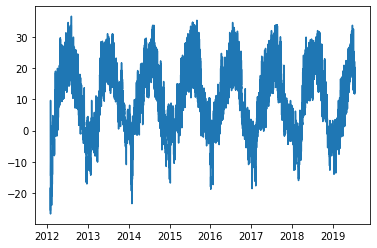

In [16]:
plt.plot(df_numeric["Local time in Kiev / Zhuliany (airport)"],df_numeric["T"])
plt.show()

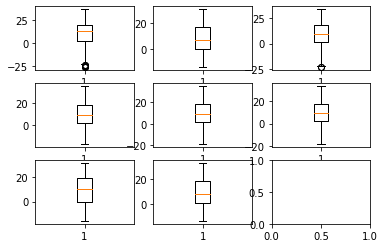

In [17]:
fig, axs = plt.subplots(3, 3)
df_year=df_numeric.groupby(df_numeric["Local time in Kiev / Zhuliany (airport)"].dt.year)
r=c=0
for i in range(2012,2020):
    axs[r,c].boxplot(df_year.get_group(i)['T'])
    c+=1
    if c==3:
        c=0
        r+=1 

In [18]:
def plt_temp_hist(i,max_array,min_array,median_array):
    df_year.get_group(i)['T']
    df_temp = df_year.get_group(i)["Local time in Kiev / Zhuliany (airport)"].dt.month
    df_temp.columns = ["Month"]
    df_temp = pd.DataFrame(df_temp)
    df_temp.rename(columns = {"Local time in Kiev / Zhuliany (airport)": "Month"}, inplace = True)
    df_temp_full = df_year.get_group(i)
    df_concat_i = pd.concat([df_temp_full, df_temp], axis=1)
    plt.subplot(3, 3, i-2012+1)
    plt.stem(df_concat_i.groupby("Month").mean()["T"])
    max_array.append(df_concat_i.groupby("Month").max()["T"])
    min_array.append(df_concat_i.groupby("Month").min()["T"])
    median_array.append(df_concat_i.groupby("Month").median()["T"])

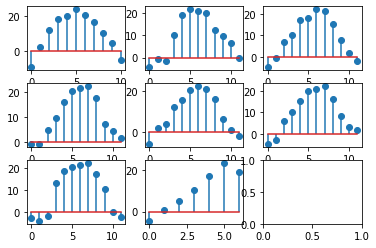

In [19]:
figure, axs = plt.subplots(3, 3)
max_array=[]
min_array=[]
median_array=[]
for i in range(2012,2020):
    plt_temp_hist(i,max_array,min_array,median_array)

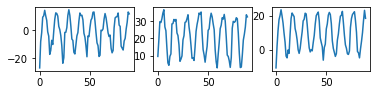

In [20]:
flat_min=[]
for i in min_array:
    for j in i:
        flat_min.append(j)
plt.subplot(3, 3, 1)
plt.plot(flat_min)
flat_max=[]
for i in max_array:
    for j in i:
        flat_max.append(j)
plt.subplot(3, 3, 2)
plt.plot(flat_max)
flat_median=[]
for i in median_array:
    for j in i:
        flat_median.append(j)
plt.subplot(3, 3, 3)
plt.plot(flat_median)

In [21]:
for i in df_numeric.columns:
    if df_numeric[i].isnull().sum()>0:
        print(i)

Po
P
Pa
U
Ff
ff10
ff3
Tn
Tx
VV
Td
RRR
tR
Tg


In [22]:
df_numeric['P'].fillna(df_numeric['P'].mean(), inplace = True)
df_numeric['U'].fillna(df_numeric['T'].mean(), inplace = True)
df_numeric['Ff'].fillna(df_numeric['Ff'].mean(), inplace = True)

In [23]:
df_numeric['Pa'].unique()

array([ nan,  1.2,  0.6,  0.9,  0. ,  0.7,  1. ,  1.1,  0.3,  0.4,  0.1,
        0.8, -0.1, -0.3, -0.2, -1.7, -1.1, -1. , -1.2, -2.3, -0.5, -0.7,
       -1.3, -1.5, -0.6, -1.6, -1.4,  0.2,  1.3,  0.5,  1.7,  1.4, -0.9,
       -0.8, -2. , -2.2, -1.8,  2.3, -0.4, -1.9,  1.6,  2. ,  2.1,  2.7,
       -2.4, -3.5, -3. ,  1.9,  2.4,  2.2,  1.5, -2.1,  1.8, -2.7, -3.6,
       -2.6,  3.6,  2.6,  2.5,  3.3,  3.2,  3.9,  3. , -2.5, -3.3,  4.4,
        3.7, -2.8, -3.9, -5.1,  2.9,  2.8, -3.2,  4.6, -2.9,  3.4,  3.1,
        3.5,  4. , -4.3, -3.1, -3.8, -3.7,  4.3])

In [24]:
df_numeric['Pa'].fillna(0, inplace = True)

In [25]:
print(df_numeric['ff3'].unique())
df_numeric[df_numeric['ff3'].isna()==False].index

[nan 18. 19. 20.]


Int64Index([  420,   424,   426,  3637,  3639,  4156,  6492,  6512,  9604,
             9668, 10236, 12641, 12865, 17481, 18315, 18459, 21065, 21067],
           dtype='int64')

In [26]:
df_numeric.drop(['ff3'], axis=1, inplace=True)

In [27]:
print(df_numeric['Tn'].isna().sum())
df[df['Tn'].isna()==False].index

19328


Int64Index([    6,    14,    22,    30,    38,    46,    54,    62,    70,
               78,
            ...
            21989, 21997, 22005, 22013, 22021, 22029, 22037, 22045, 22053,
            22061],
           dtype='int64', length=2730)

In [28]:
df_numeric['Tn'].fillna(df_numeric['Tn'].mean(), inplace = True)
df_numeric['Tx'].fillna(df_numeric['Tx'].mean(), inplace = True)
df_numeric['VV'].fillna(df_numeric['Tg'].mean(), inplace = True)
df_numeric['Td'].fillna(df_numeric['Td'].mean(), inplace = True)


In [29]:
df_numeric[(df_numeric['RRR'].isna()==False)].index

Int64Index([   16,    18,    20,    22,    24,    90,    92,    94,    96,
               98,
            ...
            21939, 21995, 22009, 22011, 22015, 22043, 22049, 22051, 22053,
            22055],
           dtype='int64', length=2297)

In [30]:
df_numeric[df_numeric['tR'].isna()==False].index

Int64Index([    4,    16,    18,    20,    22,    24,    90,    92,    94,
               96,
            ...
            21995, 22007, 22009, 22011, 22015, 22043, 22049, 22051, 22053,
            22055],
           dtype='int64', length=3287)

In [31]:
df_numeric['tR'].fillna(0, inplace = True)
df_numeric['RRR'].fillna(0, inplace = True)

In [32]:
print(df_numeric['Tg'].isna().sum())
df_numeric['Tg'].unique()

21773


array([nan,  2.,  3.,  4., -1.,  1.,  5.,  0., -2., -5., -3., -6.,  9.,
        8., 16., 15., 13.,  6., 11., -7., -8., -4.])

In [33]:
df_numeric['Tg'].fillna(df_numeric['Tg'].mean(), inplace = True)

In [34]:
df_numeric.corr()

,T,Po,P,Pa,U,Ff,ff10,N,Tn,Tx,Nh,VV,Td,RRR,tR,Tg
T,1.000000,-0.209972,-0.298304,-0.072477,-0.562147,-0.066416,-0.027540,-0.287802,3.427524e-01,3.414969e-01,-0.322354,0.434110,0.880041,-0.019394,-0.139197,3.543152e-02
Po,-0.209972,1.000000,0.995577,0.059318,-0.098144,-0.209775,0.864126,-0.219286,-8.323924e-02,-7.363436e-02,-0.174008,0.064021,-0.300048,-0.157839,-0.168815,-4.265909e-02
P,-0.298304,0.995577,1.000000,0.064012,-0.045562,-0.197727,0.875591,-0.187733,-1.140360e-01,-1.037905e-01,-0.140364,0.022773,-0.376440,-0.152630,-0.152168,-4.500666e-02
Pa,-0.072477,0.059318,0.064012,1.000000,0.104741,-0.020481,0.097590,-0.026832,1.296223e-02,1.229822e-02,0.017500,0.041244,-0.005687,0.035155,0.109245,-4.495881e-04
U,-0.562147,-0.098144,-0.045562,0.104741,1.000000,-0.126951,-0.015861,0.412644,-1.297287e-01,-1.914467e-01,0.409741,-0.668163,-0.114814,0.173568,0.258266,6.965993e-04
Ff,-0.066416,-0.209775,-0.197727,-0.020481,-0.126951,1.000000,-1.000000,0.184031,-3.380685e-02,-8.027337e-02,0.189092,0.078044,-0.153406,0.030735,0.060609,8.697111e-03
ff10,-0.027540,0.864126,0.875591,0.097590,-0.015861,-1.000000,1.000000,-0.570352,NaN,6.458160e-01,-0.570352,NaN,0.103729,-0.333333,-0.333333,NaN
N,-0.287802,-0.219286,-0.187733,-0.026832,0.412644,0.184031,-0.570352,1.000000,-1.003703e-01,-1.203146e-01,0.848239,-0.373958,-0.123476,0.118102,0.226362,1.454914e-02
Tn,0.342752,-0.083239,-0.114036,0.012962,-0.129729,-0.033807,NaN,-0.100370,1.000000e+00,-9.509562e-17,-0.102306,0.160755,0.352562,0.000137,-0.103788,1.079392e-01
Tx,0.341497,-0.073634,-0.103791,0.012298,-0.191447,-0.080273,0.645816,-0.120315,-9.509562e-17,1.000000e+00,-0.140163,0.155099,0.307651,-0.011576,-0.145781,2.286683e-16


<AxesSubplot:>

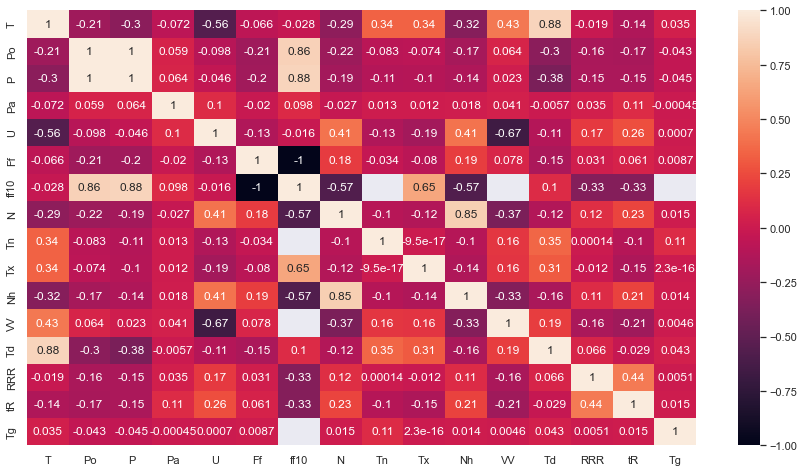

In [35]:
df_num=df_numeric.select_dtypes(include=['int64','float64'])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_num.corr(),annot=True)

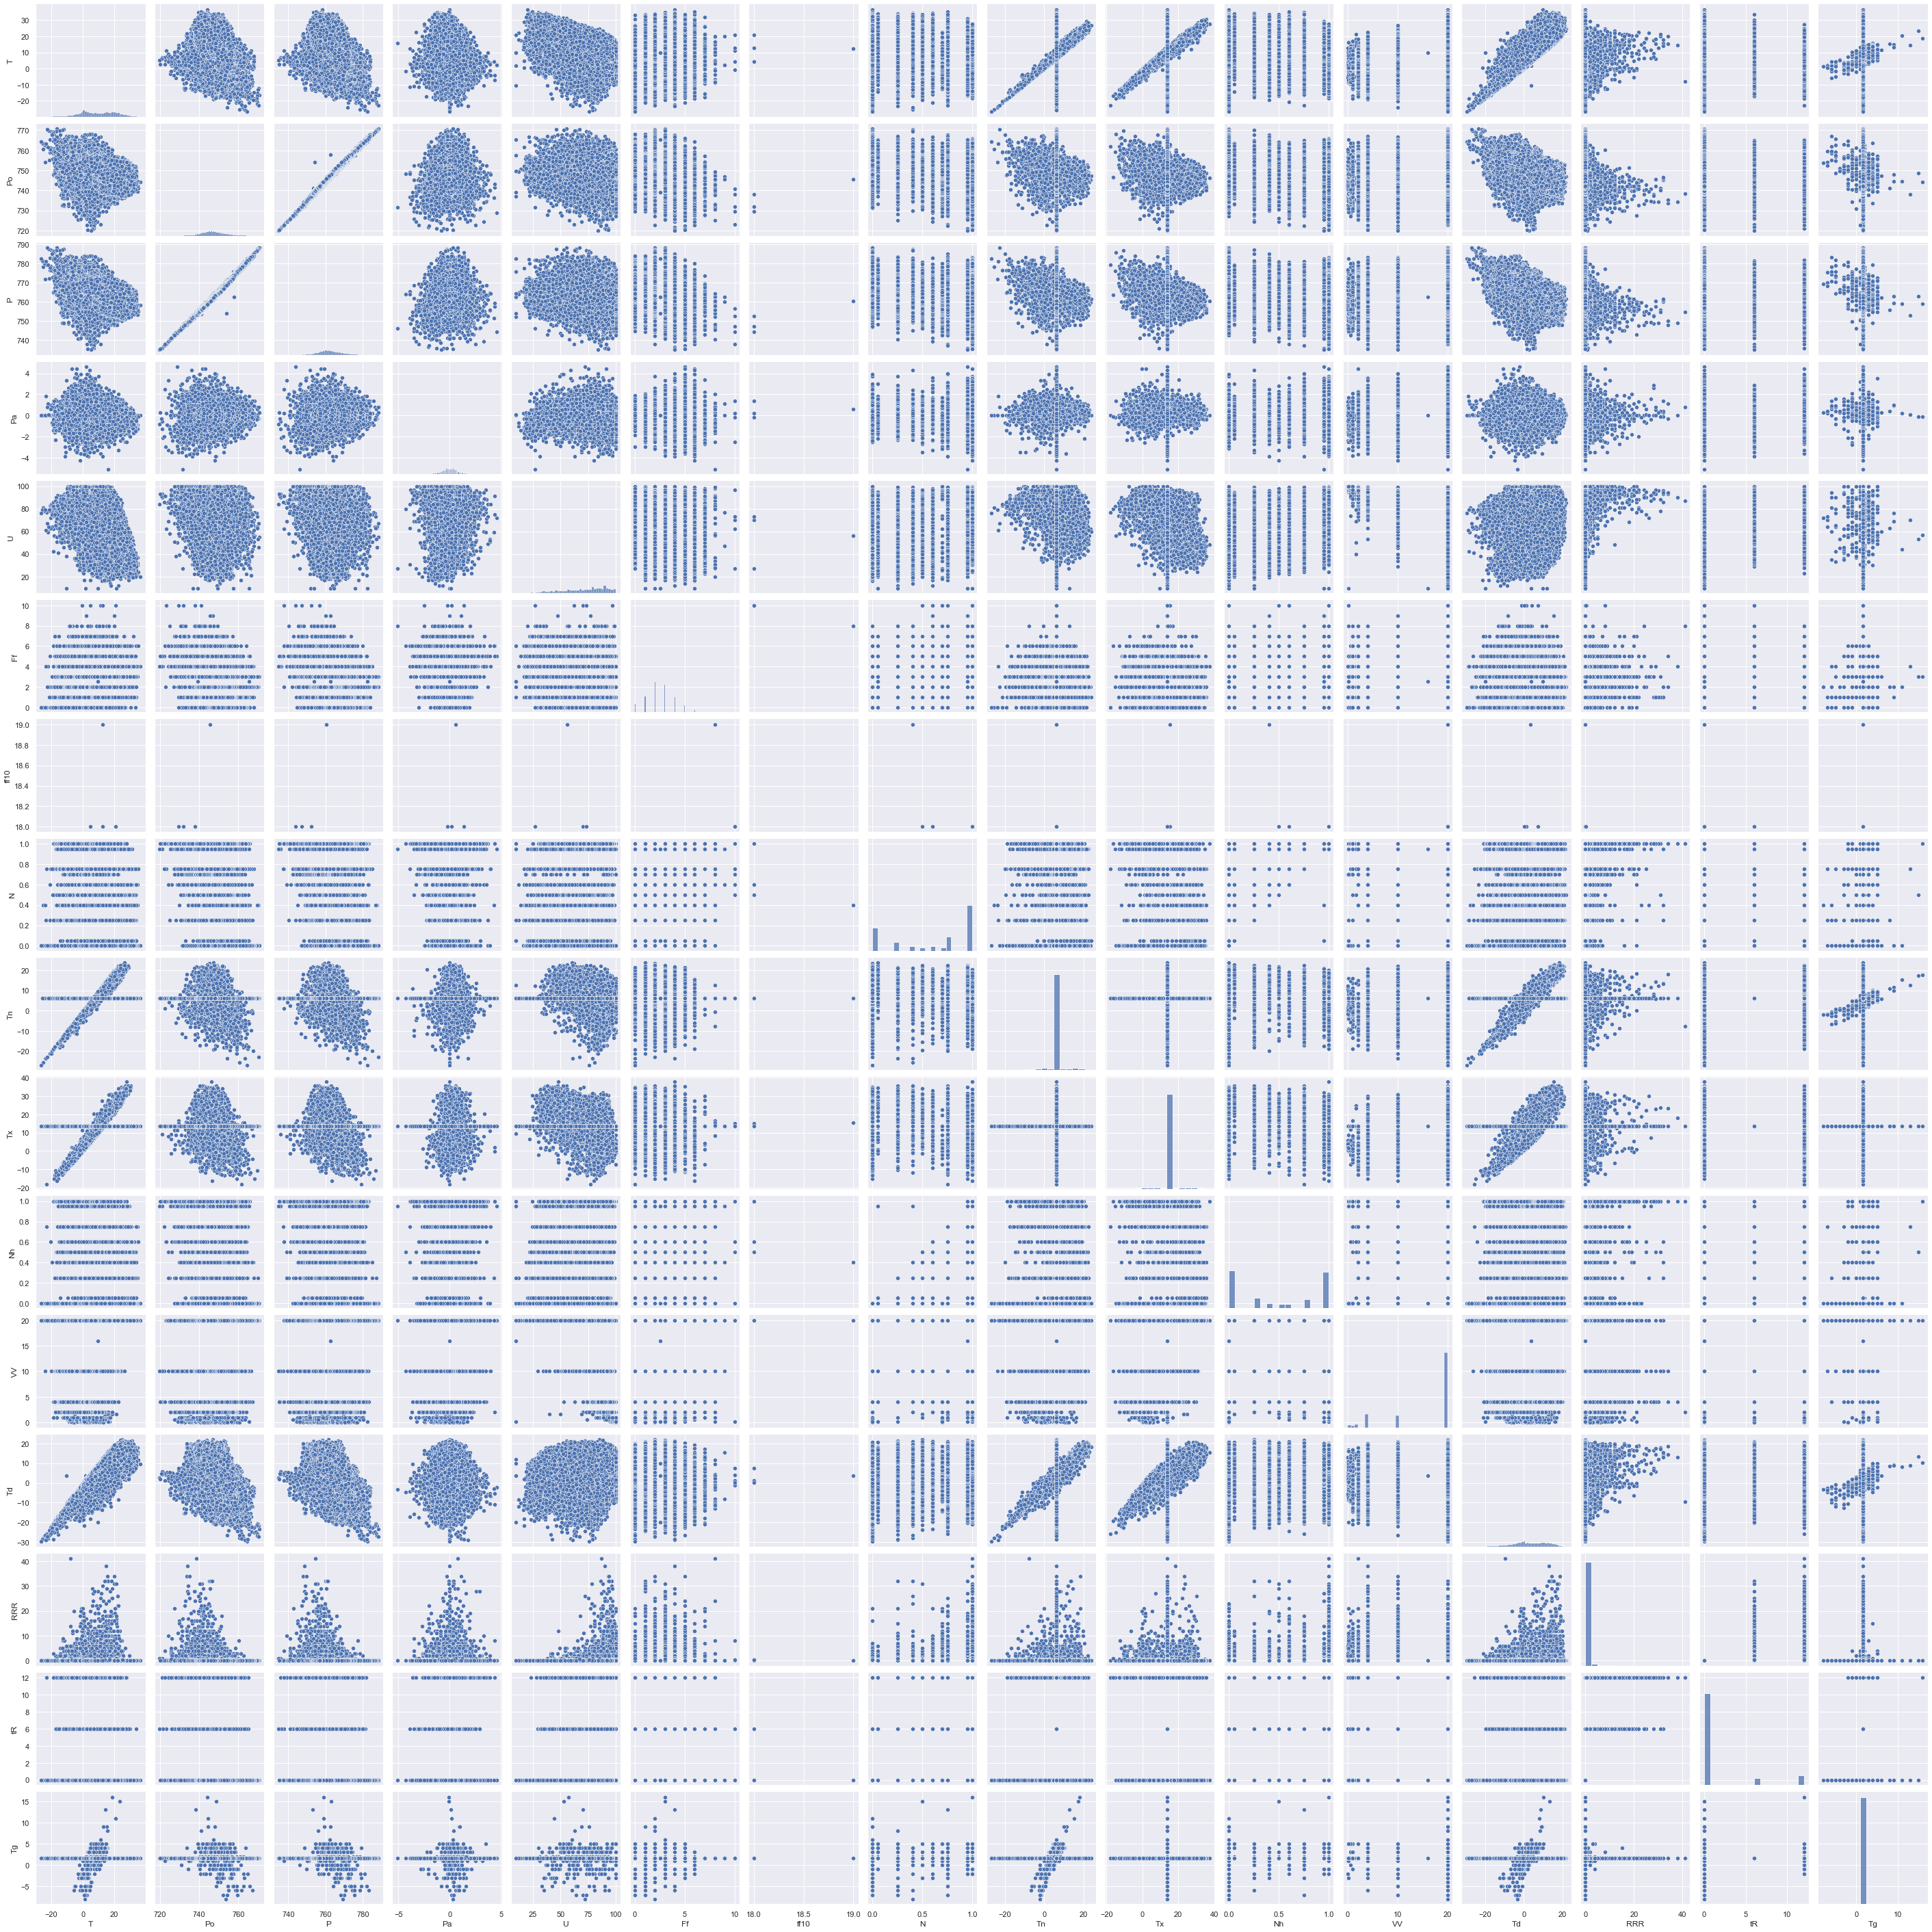

In [36]:
figsize = (50,50)
sns.pairplot(df_numeric)
plt.show()

In [37]:
print(df_numeric['ff10'].unique())
print(df_numeric[df_numeric['ff10'].isna()==False].index)

[nan 18. 19.]
Int64Index([9668, 18315, 18459, 21065], dtype='int64')


In [38]:
df_numeric.drop(['ff10'],axis=1,inplace=True)
df_numeric.drop(['Po'],axis=1,inplace=True)
df_num=df_numeric.select_dtypes(include=['int64','float64'])

In [39]:
X=df_num.drop(['RRR'],axis=1)
X.shape

(22058, 13)

In [40]:
from numpy.linalg import eig
cov_matrix=X.corr().to_numpy()
w, v = np.linalg.eig(cov_matrix)
w.sort()

In [41]:
import math
cumulative=0
total = math.fsum(w)
PCA_n_components=0
for i in range(len(w)-1,0,-1):
    PCA_n_components+=1
    print(((cumulative+w[i])/(total))*100)
    if(((cumulative+w[i])/(total))*100)>91:
        break
    cumulative+=w[i]

26.197493200180578
41.292270162503605
51.47390489529475
59.79111936232845
67.88670665345786
75.14994666434353
82.16537511044938
87.79347567086438
92.45755407632956


In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = PCA_n_components)
X = pca.fit_transform(X)

In [43]:
X.shape

(22058, 9)

In [44]:
def montly_mean(i,monthly_mean_rainfall):
    df_year.get_group(i)['RRR']
    df_rainfall = df_year.get_group(i)["Local time in Kiev / Zhuliany (airport)"].dt.month
    df_rainfall.columns = ["Month"]
    df_rainfall = pd.DataFrame(df_rainfall)
    df_rainfall.rename(columns = {"Local time in Kiev / Zhuliany (airport)": "Month"}, inplace = True)
    df_rainfall_full = df_year.get_group(i)
    df_concat_i = pd.concat([df_rainfall_full, df_rainfall], axis=1)
    monthly_mean_rainfall.append(df_concat_i.groupby("Month").mean()["RRR"])

In [45]:
monthly_mean_rainfall=[]
for i in range(2012,2020):
    montly_mean(i,monthly_mean_rainfall)

In [46]:
mean_rainfall=[]
for x in monthly_mean_rainfall:
    for y in x:
        mean_rainfall.append(y)
three_months_mean=[]
for i in range(0,len(mean_rainfall)-2,3):
    sum=mean_rainfall[i]+mean_rainfall[i+1]+mean_rainfall[i+2]
    sum/=3
    three_months_mean.append(sum)

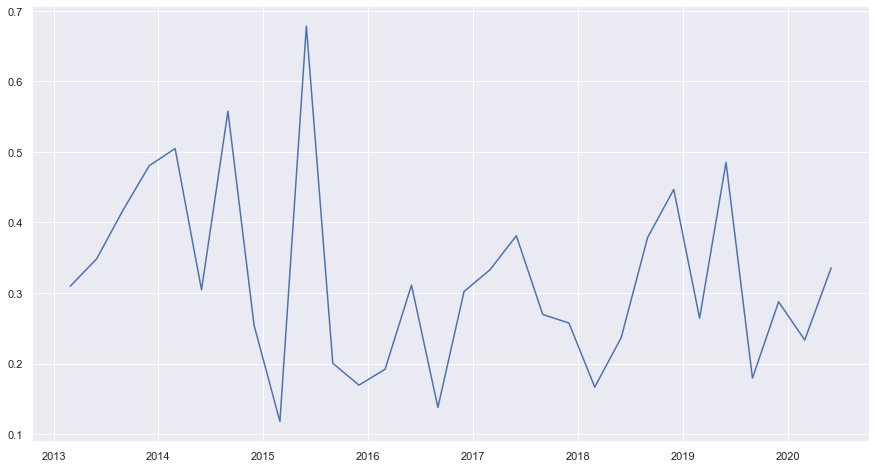

In [47]:
plt.plot(pd.date_range(start='2/2/2013', periods=30, freq='3M'),three_months_mean)
plt.show()

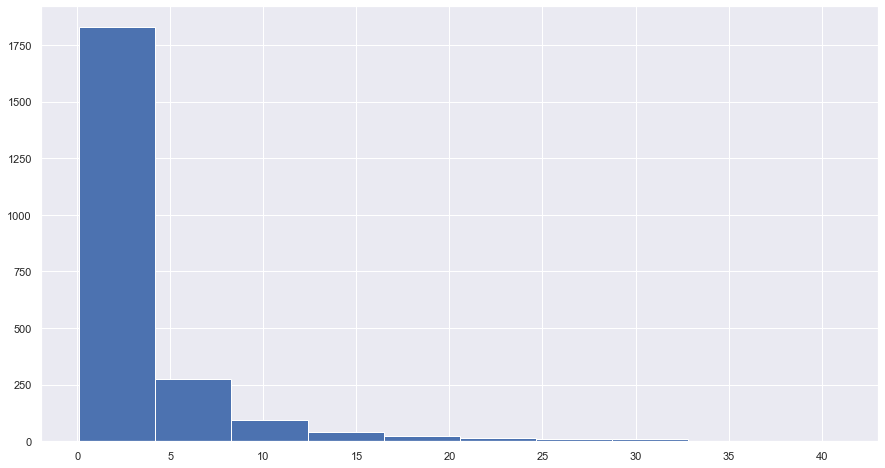

In [48]:
non_zero_RRR=df_numeric['RRR'].to_numpy()
non_zero_RRR=non_zero_RRR[np.nonzero(non_zero_RRR)]
plt.hist(non_zero_RRR,bins=10)
plt.show()


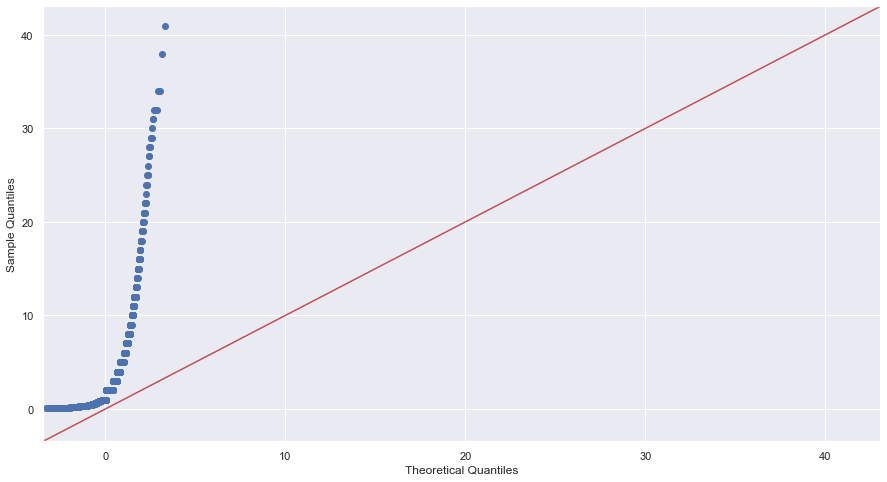

In [49]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(non_zero_RRR, line ='45')
py.show()

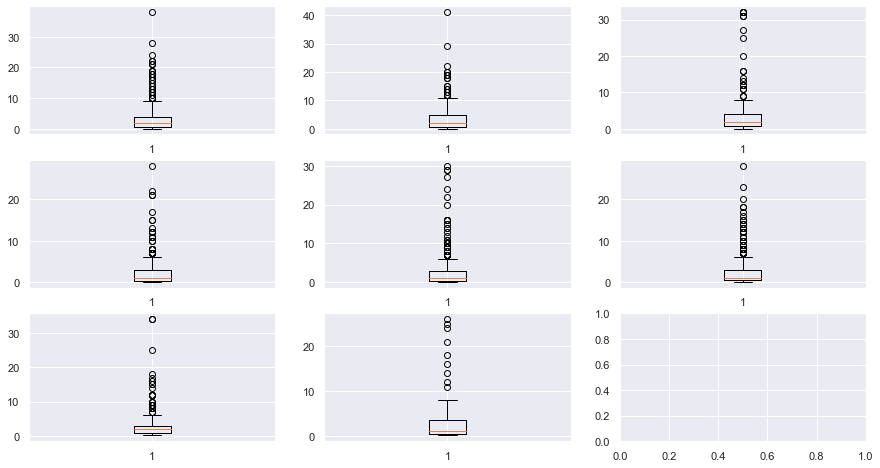

In [50]:
fig, axs = plt.subplots(3, 3)
df_year=df_numeric.groupby(df_numeric["Local time in Kiev / Zhuliany (airport)"].dt.year)
r=c=0
for i in range(2012,2020):
    series=df_year.get_group(i)['RRR']
    boxplot=[]
    for j in series:
        if j!=0:
            boxplot.append(j)
    axs[r,c].boxplot(boxplot)
    c+=1
    if c==3:
        c=0
        r+=1

<BarContainer object of 8 artists>

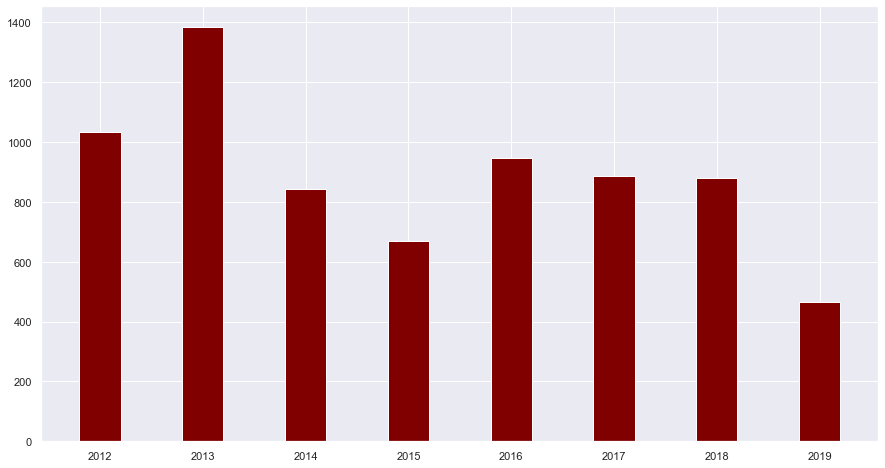

In [51]:
rain_fall_dict={}
for i in range(2012,2020):
    rain_fall_dict[i]=(df_year.get_group(i)['RRR'].sum())
X_time = list(rain_fall_dict.keys())
Y_values = list(rain_fall_dict.values())
plt.bar(X_time, Y_values, color ='maroon', width = 0.4)

In [52]:
df_numeric['bins']=df_numeric['RRR'].apply(lambda x: 1 if x > 0 else 0)
df_numeric['bins'].value_counts()

0    19761
1     2297
Name: bins, dtype: int64

In [53]:
no_rain=df_numeric[df_numeric['bins']==0]
rain=df_numeric[df_numeric['bins']!=0]
from sklearn.utils import resample
downsample_no_rain = resample(no_rain, replace=True, n_samples=df_numeric['bins'].value_counts()[1], random_state=123)

In [54]:
df_final=pd.concat([downsample_no_rain,rain])
df_final.drop(['RRR'],axis=1,inplace=True)
df_final = df_final.sample(frac=1).reset_index(drop=True)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(['bins','Local time in Kiev / Zhuliany (airport)'],axis=1), df_final['bins'], test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [56]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[443  25]
 [  0 451]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       468
           1       0.95      1.00      0.97       451

    accuracy                           0.97       919
   macro avg       0.97      0.97      0.97       919
weighted avg       0.97      0.97      0.97       919

0.9727965179542981


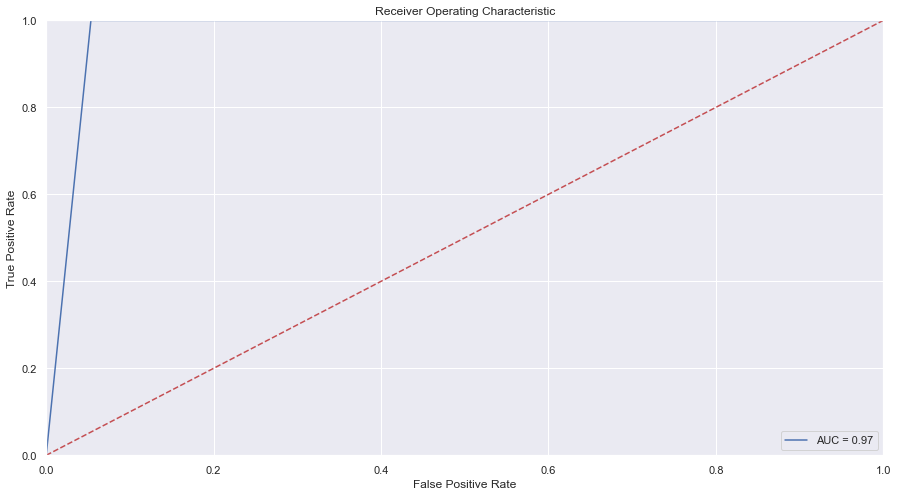

In [57]:
# roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()